# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
env = UnityEnvironment(file_name="../banana_unity_env/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

## Model

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, 64)
        self.ac1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.ac2 = nn.ReLU()
        self.fc3 = nn.Linear(64, action_size)

    def preprocess_input(self, state):
        return state

    def forward(self, state):
        """Build a network that maps state -> action values."""
        # perform the forward pass
        # x = self.preprocess_input(state)
        x = self.ac1(self.fc1(state))
        x = self.ac2(self.fc2(x))
        x = self.fc3(x)
        # x = self.model(state)
        return x



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, 64)
        self.ac1 = nn.ReLU()
        self.drop1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 64)
        self.ac2 = nn.ReLU()
        self.drop2 = nn.Dropout(0.2)
#         self.fc3 = nn.Linear(512, 64)
#         self.ac3 = nn.ReLU()
#         self.drop3 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(64, action_size)

    def preprocess_input(self, state):
        return state

    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = self.drop1(self.ac1(self.fc1(state)))
        x = self.drop2(self.ac2(self.fc2(x)))
#         x = self.drop3(self.ac3(self.fc3(x)))
        x = self.fc3(x)
        return x

## Agent

This part will present a vanilla version of the DQN algorithm, only with Experience Replay Buffer and Target Network. The next part will show the impact of adding the improvements presented in class.

In [14]:
import numpy as np
import random
from collections import namedtuple, deque
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.optim as optim


class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, 
                 state_size, 
                 action_size,
                 t_step=0,
                 alpha=0.1,
                 model_path=None,
                 buffer_size=int(1e5),
                 batch_size=64,
                 gamma=0.99,
                 tau=1e-3,
                 learning_rate=5e-4,
                 update_every=4,
                 seed=0):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        # Q-Network
        if not model_path:
            print(f"Creating new models for local and target networks.")
            self.qnetwork_local = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed).to(self.device)
            self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=learning_rate)
            self.training = True
        else:
            print(f"Loading model from file {model_path}")
            self.qnetwork_local = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_local.load_state_dict(torch.load(model_path))
            self.qnetwork_target.load_state_dict(torch.load(model_path))
            self.training = False
        
        # Replay memory
        self.memory = PrioritizedReplayBuffer(action_size, buffer_size, batch_size, seed, self.device)
        
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = t_step
        self.alpha = alpha
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau
        self.learning_rate = learning_rate
        self.update_every = update_every
        

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # Compute target values: # reward + gamma * max(Q(s', a')) * (1-done)
        td_targets_next_states = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        td_targets = rewards + (gamma*td_targets_next_states * (1-dones))
#         print(f"td_targets_next_states: {td_targets_next_states.shape}. Should be {rewards.shape[0]}")
        
        # Current Q values
        q_values_local = self.qnetwork_local(states).gather(1, actions) # Q
        
        # compute loss
        loss = F.mse_loss(q_values_local, td_targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- # # Only update the target network after we pass on the samples
        self.soft_update(self.qnetwork_local, self.qnetwork_target, self.tau)                     


    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
            
            
    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % self.update_every
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > self.batch_size:
                experiences = self.memory.sample()
                self.learn(experiences, self.gamma)

                
    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
            
        if self.training:
            self.qnetwork_local.train()
        
        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))


class PrioritizedReplayBuffer: # TODO: Implement Prioritized Experience Replay    
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed, device):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.device = device
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(self.device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(self.device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(self.device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(self.device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(self.device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

    

## Training algorithm: Deep Q-Learning

In [9]:
import numpy as np
import time

def dqn(agent, env, brain_name, model_name="dqn_3fc_act_nodrop", n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """
    Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    timestr = time.strftime("%Y%m%d-%H%M%S")
    best = 0
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]            
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action.astype(np.int32))[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]             
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=5.0 and np.mean(scores_window)>best:
            best = np.mean(scores_window)
            print(f"\nOverwriting last checkpiont with current average score: {best}")
            filename = model_name + timestr + f"-score-{int(np.mean(scores_window))}" + ".pth"
            torch.save(agent.qnetwork_local.state_dict(), filename)
            
    return scores

## Train

### Instantiate the environment and the agent

In [12]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="../banana_unity_env/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [6]:
t_step = 0
alpha = 0.1
gamma = 0.99
epsilon = 0.99
agent = Agent(state_size=37, 
              action_size=4,
              t_step=t_step,
              alpha=alpha,
              gamma=gamma,
              seed=0)

### Run the Deep Q-Learning Algorithm

In [ ]:
# 4FC with act and dropout (max width=512)
scores = dqn(agent, 
             env, 
             brain_name,
             model_name="dqn_4f_act_drop"
             n_episodes=2000, 
             max_t=1000, 
             eps_start=1.0, 
             eps_end=0.01, 
             eps_decay=0.995)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: -0.01
Episode 200	Average Score: 1.972
Episode 300	Average Score: 6.67
Episode 400	Average Score: 9.86
Episode 500	Average Score: 11.77
Episode 600	Average Score: 13.48
Episode 700	Average Score: 14.02
Episode 800	Average Score: 13.13
Episode 900	Average Score: 13.41
Episode 1000	Average Score: 12.42
Episode 1100	Average Score: 14.12
Episode 1200	Average Score: 14.01
Episode 1300	Average Score: 13.05
Episode 1400	Average Score: 12.89
Episode 1442	Average Score: 12.93

Episode 100	Average Score: 0.78
Episode 200	Average Score: 4.27
Episode 300	Average Score: 6.86
Episode 400	Average Score: 10.49
Episode 500	Average Score: 13.23
Episode 600	Average Score: 13.57
Episode 700	Average Score: 14.30
Episode 739	Average Score: 15.00
Environment solved in 639 episodes!	Average Score: 15.00
Overwriting last checkpiont with current average score: 15.0
Episode 740	Average Score: 15.09
Environment solved in 640 episodes!	Average Score: 15.09
Overwriting last checkpiont with current average score: 15.09
Episode 742	Average Score: 15.11
Environment solved in 642 episodes!	Average Score: 15.11
Overwriting last checkpiont with current average score: 15.11
Episode 743	Average Score: 15.16
Environment solved in 643 episodes!	Average Score: 15.16
Overwriting last checkpiont with current average score: 15.16
Episode 745	Average Score: 15.19
Environment solved in 645 episodes!	Average Score: 15.19
Overwriting last checkpiont with current average score: 15.19
Episode 746	A

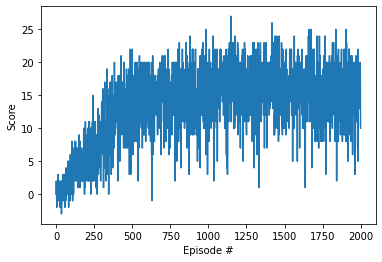

In [7]:
# 3 FC with act (max=64)
scores = dqn(agent, 
             env, 
             brain_name, 
             n_episodes=2000, 
             max_t=1000, 
             eps_start=1.0, 
             eps_end=0.01, 
             eps_decay=0.995)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
# 3 FC with act (max width = 64)
scores = dqn(agent, 
             env, 
             brain_name,
             model_name="dqn_3fc_act_nodrop",
             n_episodes=2000, 
             max_t=1000, 
             eps_start=1.0, 
             eps_end=0.01, 
             eps_decay=0.995)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 0.78
Episode 200	Average Score: 4.27
Episode 228	Average Score: 5.01
Overwriting last checkpiont with current average score: 5.01
Episode 232	Average Score: 5.05
Overwriting last checkpiont with current average score: 5.05
Episode 236	Average Score: 5.07
Overwriting last checkpiont with current average score: 5.07
Episode 239	Average Score: 5.10
Overwriting last checkpiont with current average score: 5.1
Episode 242	Average Score: 5.16
Overwriting last checkpiont with current average score: 5.16
Episode 243	Average Score: 5.24
Overwriting last checkpiont with current average score: 5.24
Episode 244	Average Score: 5.34
Overwriting last checkpiont with current average score: 5.34
Episode 245	Average Score: 5.41
Overwriting last checkpiont with current average score: 5.41
Episode 248	Average Score: 5.44
Overwriting last checkpiont with current average score: 5.44
Episode 249	Average Score: 5.45
Overwriting last checkpiont with current average score: 5.45
Episode

Episode 378	Average Score: 9.51
Overwriting last checkpiont with current average score: 9.51
Episode 379	Average Score: 9.59
Overwriting last checkpiont with current average score: 9.59
Episode 381	Average Score: 9.62
Overwriting last checkpiont with current average score: 9.62
Episode 383	Average Score: 9.69
Overwriting last checkpiont with current average score: 9.69
Episode 384	Average Score: 9.77
Overwriting last checkpiont with current average score: 9.77
Episode 385	Average Score: 9.80
Overwriting last checkpiont with current average score: 9.8
Episode 386	Average Score: 9.87
Overwriting last checkpiont with current average score: 9.87
Episode 388	Average Score: 9.94
Overwriting last checkpiont with current average score: 9.94
Episode 389	Average Score: 9.99
Overwriting last checkpiont with current average score: 9.99
Episode 390	Average Score: 10.04
Overwriting last checkpiont with current average score: 10.04
Episode 391	Average Score: 10.10
Overwriting last checkpiont with cur

Episode 694	Average Score: 14.16
Overwriting last checkpiont with current average score: 14.16
Episode 695	Average Score: 14.18
Overwriting last checkpiont with current average score: 14.18
Episode 696	Average Score: 14.19
Overwriting last checkpiont with current average score: 14.19
Episode 697	Average Score: 14.24
Overwriting last checkpiont with current average score: 14.24
Episode 698	Average Score: 14.25
Overwriting last checkpiont with current average score: 14.25
Episode 699	Average Score: 14.28
Overwriting last checkpiont with current average score: 14.28
Episode 700	Average Score: 14.30

Overwriting last checkpiont with current average score: 14.3
Episode 713	Average Score: 14.32
Overwriting last checkpiont with current average score: 14.32
Episode 716	Average Score: 14.41
Overwriting last checkpiont with current average score: 14.41
Episode 719	Average Score: 14.44
Overwriting last checkpiont with current average score: 14.44
Episode 720	Average Score: 14.51
Overwriting last 

## Visualize model performance

In [10]:
import time

def test_agent(agent, env, brain_name, times=5, max_t=500, freq=60):
    scores = []
    for i in range(times):
        env_info = env.reset(train_mode=False)[brain_name]
        state = env_info.vector_observations[0]         
        score = 0                                       
        for i in range(max_t):
            action = agent.act(state, eps=0) # eps = 0 means the policy is 100% greedy
            env_info = env.step(action.astype(np.int32))[brain_name] 
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]                
            done = env_info.local_done[0]
            score += reward
            state = next_state
            if done:
                break
            time.sleep(1/freq)
        
        scores.append(score)
        print(f"Episode ended with score: {score}. Starting a new one")
        time.sleep(2)
        
    return scores

In [ ]:
model_path = "./dqn_3fc_act_nodrop_avg17.pth"

t_step = 0
alpha = 0.1
gamma = 0.99
epsilon = 0.99
agent = Agent(state_size=37, 
              action_size=4,
              t_step=t_step,
              alpha=alpha,
              model_path=model_path,
              seed=0)

test_agent(agent, env, brain_name)

Loading model from file ./dqn_3fc_act_nodrop_avg17.pth
Episode ended with score: 16.0. Starting a new one
Episode ended with score: 11.0. Starting a new one
Episode ended with score: 14.0. Starting a new one
Episode ended with score: 19.0. Starting a new one


# --------------------------------------------------------------------------------------------------------

# Implementing improvements: 

### Double DQN, Dueling DQN and Prioritized Experience Replay

In [ ]:
import numpy as np
import random
from collections import namedtuple, deque
import matplotlib.pyplot as plt

# from model import QNetwork

import torch
import torch.nn.functional as F
import torch.optim as optim

import torch
import torch.nn as nn
import torch.nn.functional as F


class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        """
        TODO: IMPROVE MODEL
        """
        self.fc1 = nn.Linear(state_size, 64)
        self.ac1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.ac2 = nn.ReLU()
        self.fc3 = nn.Linear(64, action_size)
        
        """
        TODO: IMPLEMENT DUELING DQNS: SEPARATE VALUE FROM ACTION
        
        
        ONE NET OUTPUT WILL BE A SINGLE VALUE FOR THE STATE
        THE OTHER OUTPUT WILL BE ONE VALUE FOR EACH ACTION ???
        """


    def preprocess_input(self, state):
        return state

    def forward(self, state):
        """Build a network that maps state -> action values."""
        # perform the forward pass
        # x = self.preprocess_input(state)
        x = self.ac1(self.fc1(state))
        x = self.ac2(self.fc2(x))
        x = self.fc3(x)
        # x = self.model(state)
        return x


# """
# TODO: IMPROVE PARAMETERS
# """
# BUFFER_SIZE = int(1e5)  # replay buffer size
# BATCH_SIZE = 64         # minibatch size
# GAMMA = 0.99            # discount factor
# TAU = 1e-3              # for soft update of target parameters
# LR = 5e-4               # learning rate 
# UPDATE_EVERY = 4        # how often to update the network

class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, 
                 state_size, 
                 action_size,
                 t_step=0,
                 alpha=0.1,
                 model_path=None,
                 buffer_size=int(1e5),
                 batch_size=64,
                 gamma=0.99,
                 tau=1e-3,
                 learning_rate=5e-4,
                 update_every=4,
                 seed=0):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        # Q-Network
        if not model_path:
            self.qnetwork_local = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed).to(self.device)
            self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=learning_rate)
            self.training = True
        else:
            print(f"Loading model from file {model_path}")
            self.qnetwork_local = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_target = QNetwork(state_size, action_size, seed).to(self.device)
            self.qnetwork_local.load_state_dict(torch.load(model_path))
            self.qnetwork_target.load_state_dict(torch.load(model_path))
            self.training = False
        
        # Replay memory
        self.memory = PrioritizedReplayBuffer(action_size, buffer_size, batch_size, seed)
        
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = t_step
        self.alpha = alpha
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau
        self.learning_rate = learning_rate
        self.update_every = update_every
        

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences
        
        

#         # Compute target values: # reward + gamma * max(Q(s', a')) * (1-done)
#         td_targets_next_states = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
#         td_targets = rewards + (gamma*td_targets_next_states * (1-dones))
        
        """
        TODO: IMPLEMENT DOUBLE DQN: INSTEAD OF CALCULATING THE MAX VALUE USING THE TARGET NETWORK, 
        WE WILL GET THE INDEX OF THE ACTION USING THE LOCAL NETWORK. WITH THIS INDEX, WE WILL GET THE VALUE CALCULATED
        USING THE TARGET NETWORK
        
        From the paper:
        In the original Double Q-learning algorithm, two value
        functions are learned by assigning each experience randomly to update one of the two value functions, such that
        there are two sets of weights, θ and θ`. For each update, one
        set of weights is used to determine the greedy policy and the
        other to determine its value. For a clear comparison, we can
        first untangle the selection and evaluation in Q-learning and
        rewrite its target (2) as
        
        PSEUDOCODE
        td_targets_next_states_indexes = np.argmax(self.qnetwork_local(next_states), axis=1)
        td_targets_next_states = self.qnetwork_target(next_states).gather(td_targets_next_states_indexes)
        
        """
        td_targets_next_states_indexes = np.argmax(self.qnetwork_local(next_states), axis=1) # Get the action index using the local network
        td_targets_next_states = self.qnetwork_target(next_states).gather(td_targets_next_states_indexes) # use the indexes to get the values from the target network
        td_targets = rewards + (gamma*td_targets_next_states * (1-dones)) # calculate the target just as before
        
        
        
#         print(f"td_targets_next_states: {td_targets_next_states.shape}. Should be {rewards.shape[0]}")
        
        # Current Q values
        q_values_local = self.qnetwork_local(states).gather(1, actions) # Q
        
        # compute loss
        loss = F.mse_loss(q_values_local, td_targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- # # Only update the target network after we pass on the samples
        self.soft_update(self.qnetwork_local, self.qnetwork_target, self.tau)                     


    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

            
    def calculate_error_delta(self, state, action, reward, next_state, done):
        # Compute target values: # reward + gamma * max(Q(s', a')) * (1-done)
        # VANILA DQN. DO DOUBLE DQN LATER
        td_targets_next_state = self.qnetwork_target(next_state).detach().max(1)[0].unsqueeze(1)
        td_target = reward + (gamma*td_targets_next_state * (1-dones))
        
        q_value_local = self.qnetwork_local(state).gather(1, action) # Q
        
        delta_error = td_target - q_value_local
        return delta_error

            
    def step(self, state, action, reward, next_state, done):
        
        error = self.calculate_error_delta(state, action, reward, next_state, done)
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done, error)
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % self.update_every
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > self.batch_size:
                experiences = self.memory.sample()
                self.learn(experiences, self.gamma)

                
    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
            
        if self.training:
            self.qnetwork_local.train()
        
        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))


class PrioritizedReplayBuffer:
    """
    TODO: IMPLEMENT PRIORITIZED EXPERIENCE REPLAY
    
    """    
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done", "error"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done, error):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done, error)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

    

## Train new agent

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="./Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [ ]:
alpha = 0.1
gamma = 0.99
epsilon = 0.99
agent = Agent(state_size=8, 
              action_size=4,
              t_setp=t_step,
              alpha=alpha,
              gamma=gamma,
              seed=0)


n_episodes=2000
max_t=1000
eps_start=1.0
eps_end=0.01
eps_decay=0.995

scores = dqn(agent, env, brain_name, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Rainbow DQN: 

### Implementing Learning from multi-step boostrap targets, Distributional DQN and Noisy DQN on top of the previous one